In [ ]:
import polars as pl
import os
l_path = '/data-cbl/bcaron/NCBoost/ncboost2'
os.chdir(f'{l_path}')

## Load and annotate variants

In [ ]:
variants = pl.read_csv(source = f'{l_path}/data/testing/testing_data.tsv', 
                   separator = '\t',
                   null_values='NA',
                   schema_overrides={'chr':str, 'pos':int, 'rsid':str, 'ref':str, 'alt':str,'label':int}
                   )
variants.head()

chr,pos,rsid,ref,alt,label
str,i64,str,str,str,i64
"""1""",7961859,"""null""","""C""","""G""",1
"""1""",11022737,"""rs80356744""","""T""","""C""",1
"""1""",11023351,"""rs387906334""","""G""","""A""",1
"""1""",11790916,"""rs777661576""","""C""","""T""",1
"""1""",13308295,"""rs566581137""","""C""","""A""",0


In [3]:
from src.ncboost_functions import add_ncboost_features

variants = add_ncboost_features(variants, db_path='/data-cbl/bcaron/NCBoost/ncboost_dev/data/WG_annotated')
variants = variants.drop('NCBoost')

/data-cbl/bcaron/.conda/envs/ncboost/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Chromosomes:   0%|          | 0/24 [00:00<?, ?it/s]

In [4]:
variants.write_csv(file = f'{l_path}/data/testing/testing_data_annotated.tsv', 
                        separator = "\t", 
                        include_header = True
                        )

## Score Variants

In [5]:
variants = pl.read_csv(source = f'{l_path}/data/testing/testing_data_annotated.tsv', 
                   separator = '\t',
                   null_values='NA',
                   schema_overrides={'chr':str}
                   )
variants.head()

chr,pos,rsid,ref,alt,label,region,closest_gene_name,closest_gene_ENSG,paml_dnds,slr_dnds,paml_pvalue,paml_bh,gene_age,pLI,zscore_mis,zscore_syn,loeuf,GDI,ncRVIS,ncGERP,RVIS_percentile,pcGERP,CADD_ENSG,CADD_GeneName,GC,CpG,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,bStatistic,GerpRS,GerpRSpval,GerpN,GerpS,Aparent2,ZooPriPhyloP,ZooVerPhyloP,ZooRoCC,ZooUCE,Roulette-FILTER,Roulette-MR,Roulette-AR,CADD,CADD_phred,CDTS,mean_MAF,mean_MAF_afr,mean_MAF_ami,mean_MAF_amr,mean_MAF_asj,mean_MAF_eas,mean_MAF_fin,mean_MAF_mid,mean_MAF_nfe,mean_MAF_sas,ReMM,SpliceAI,UTR3,UTR5,downstream,intergenic,intronic,upstream,partition
str,i64,str,str,str,i64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64
"""1""",7961859,"""null""","""C""","""G""",1,"""intronic""","""PARK7""","""ENSG00000116288""",0.06659,0.06503,0.2592,0.5241,0.0,0.0013008,0.36438,-0.51419,1.025,67.74927,0.085881,-1.289033,60.090823,45.404095,null,null,0.781,0.253,0.69,0.0,0.001,0.399,-0.152,-0.334,824.0,null,null,3.24,0.217,null,0.091,0.0,null,null,"""TFBS""",0.083,0.094,1.042958,10.81,-11.9677,0.004686,0.012429,0.123988,0.015091,0.109764,0.012163,0.081921,0.074301,0.008839,0.025181,0.930087,0.0,0,0,0,0,1,0,4
"""1""",11022737,"""rs80356744""","""T""","""C""",1,"""UTR3""","""TARDBP""","""ENSG00000120948""",0.0279,0.02766,0.006474,0.03594,0.0,1.0,5.3187,0.24967,0.229,2.30437,-0.680325,3.245378,27.418023,13.653017,"""ENSG00000009724""","""MASP2""",0.298,0.0,0.979,1.0,1.0,0.467,3.166,5.032,848.0,9701.77,0.0,6.12,6.12,0.08907,0.999,2.411,null,null,"""low""",0.02,null,1.400023,13.57,-5.50229,0.000184,0.000249,0.0252193,0.0008,0.007777,0.001048,0.009617,0.005102,0.000474,0.000673,0.972025,0.0,1,0,0,0,0,0,5
"""1""",11023351,"""rs387906334""","""G""","""A""",1,"""UTR3""","""TARDBP""","""ENSG00000120948""",0.0279,0.02766,0.006474,0.03594,0.0,1.0,5.3187,0.24967,0.229,2.30437,-0.680325,3.245378,27.418023,13.653017,"""ENSG00000009724""","""MASP2""",0.464,0.12,0.997,1.0,1.0,0.595,0.926,2.587,849.0,9701.77,0.0,6.2,2.63,null,1.0,4.134,248.0,null,"""high""",1.966,null,2.002378,16.76,-12.9149,0.000168,0.000224,0.0252193,0.000746,0.007489,0.000272,0.007299,0.003401,0.000435,0.000442,0.914964,0.02,1,0,0,0,0,0,5
"""1""",11790916,"""rs777661576""","""C""","""T""",1,"""intronic""","""MTHFR""","""ENSG00000177000""",0.09733,0.09315,0.3499,0.6468,0.0,1.0506e-11,2.024,0.35912,0.859,4524.99996,-0.072474,-0.788072,60.710073,36.783405,"""ENSG00000177000""","""MTHFR""",0.57,0.053,0.004,0.0,0.0,0.407,-0.384,-0.372,900.0,null,null,1.46,-0.585,null,0.001,0.43,null,null,"""TFBS""",0.073,null,0.091441,1.519,1.45327,0.00197,0.005657,0.038807,0.0062,0.028183,0.011548,0.018624,0.043537,0.003341,0.015078,0.72465,0.91,0,0,0,0,1,0,6
"""1""",13308295,"""rs566581137""","""C""","""A""",0,"""intronic""","""PRAMEF33""","""ENSG00000237700""",null,null,null,null,null,0.052995,1.9936,1.5978,1.53,null,null,null,null,null,"""ENSG00000237700""","""PRAMEF33""",0.483,0.0,0.011,0.0,0.0,0.336,-0.124,-0.241,null,null,null,2.12,0.17,null,0.071,0.333,null,null,"""low""",0.062,null,0.328103,3.582,null,0.007554,0.012117,0.078504,0.014881,0.028994,0.017286,0.02967,0.057277,0.013875,0.022553,0.341683,null,0,0,0,0,1,0,10


In [ ]:
from src.ncboost_functions import ncboost_score
model_folder = 'ncboost_models'
variants = ncboost_score(variants, model_name='ncboost_models')
variants.head()

chr,pos,rsid,ref,alt,label,region,closest_gene_name,closest_gene_ENSG,paml_dnds,slr_dnds,paml_pvalue,paml_bh,gene_age,pLI,zscore_mis,zscore_syn,loeuf,GDI,ncRVIS,ncGERP,RVIS_percentile,pcGERP,CADD_ENSG,CADD_GeneName,GC,CpG,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,bStatistic,GerpRS,GerpRSpval,GerpN,GerpS,Aparent2,ZooPriPhyloP,ZooVerPhyloP,ZooRoCC,ZooUCE,Roulette-FILTER,Roulette-MR,Roulette-AR,CADD,CADD_phred,CDTS,mean_MAF,mean_MAF_afr,mean_MAF_ami,mean_MAF_amr,mean_MAF_asj,mean_MAF_eas,mean_MAF_fin,mean_MAF_mid,mean_MAF_nfe,mean_MAF_sas,ReMM,SpliceAI,UTR3,UTR5,downstream,intergenic,intronic,upstream,partition,partition_right,NCBoost
str,i64,str,str,str,i64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64
"""1""",7961859,"""null""","""C""","""G""",1,"""intronic""","""PARK7""","""ENSG00000116288""",0.06659,0.06503,0.2592,0.5241,0.0,0.0013008,0.36438,-0.51419,1.025,67.74927,0.085881,-1.289033,60.090823,45.404095,null,null,0.781,0.253,0.69,0.0,0.001,0.399,-0.152,-0.334,824.0,null,null,3.24,0.217,null,0.091,0.0,null,null,"""TFBS""",0.083,0.094,1.042958,10.81,-11.9677,0.004686,0.012429,0.123988,0.015091,0.109764,0.012163,0.081921,0.074301,0.008839,0.025181,0.930087,0.0,0,0,0,0,1,0,4,4,0.031678
"""1""",11022737,"""rs80356744""","""T""","""C""",1,"""UTR3""","""TARDBP""","""ENSG00000120948""",0.0279,0.02766,0.006474,0.03594,0.0,1.0,5.3187,0.24967,0.229,2.30437,-0.680325,3.245378,27.418023,13.653017,"""ENSG00000009724""","""MASP2""",0.298,0.0,0.979,1.0,1.0,0.467,3.166,5.032,848.0,9701.77,0.0,6.12,6.12,0.08907,0.999,2.411,null,null,"""low""",0.02,null,1.400023,13.57,-5.50229,0.000184,0.000249,0.0252193,0.0008,0.007777,0.001048,0.009617,0.005102,0.000474,0.000673,0.972025,0.0,1,0,0,0,0,0,5,5,0.115872
"""1""",11023351,"""rs387906334""","""G""","""A""",1,"""UTR3""","""TARDBP""","""ENSG00000120948""",0.0279,0.02766,0.006474,0.03594,0.0,1.0,5.3187,0.24967,0.229,2.30437,-0.680325,3.245378,27.418023,13.653017,"""ENSG00000009724""","""MASP2""",0.464,0.12,0.997,1.0,1.0,0.595,0.926,2.587,849.0,9701.77,0.0,6.2,2.63,null,1.0,4.134,248.0,null,"""high""",1.966,null,2.002378,16.76,-12.9149,0.000168,0.000224,0.0252193,0.000746,0.007489,0.000272,0.007299,0.003401,0.000435,0.000442,0.914964,0.02,1,0,0,0,0,0,5,5,0.174726
"""1""",11790916,"""rs777661576""","""C""","""T""",1,"""intronic""","""MTHFR""","""ENSG00000177000""",0.09733,0.09315,0.3499,0.6468,0.0,1.0506e-11,2.024,0.35912,0.859,4524.99996,-0.072474,-0.788072,60.710073,36.783405,"""ENSG00000177000""","""MTHFR""",0.57,0.053,0.004,0.0,0.0,0.407,-0.384,-0.372,900.0,null,null,1.46,-0.585,null,0.001,0.43,null,null,"""TFBS""",0.073,null,0.091441,1.519,1.45327,0.00197,0.005657,0.038807,0.0062,0.028183,0.011548,0.018624,0.043537,0.003341,0.015078,0.72465,0.91,0,0,0,0,1,0,6,6,0.864655
"""1""",13308295,"""rs566581137""","""C""","""A""",0,"""intronic""","""PRAMEF33""","""ENSG00000237700""",null,null,null,null,null,0.052995,1.9936,1.5978,1.53,null,null,null,null,null,"""ENSG00000237700""","""PRAMEF33""",0.483,0.0,0.011,0.0,0.0,0.336,-0.124,-0.241,null,null,null,2.12,0.17,null,0.071,0.333,null,null,"""low""",0.062,null,0.328103,3.582,null,0.007554,0.012117,0.078504,0.014881,0.028994,0.017286,0.02967,0.057277,0.013875,0.022553,0.341683,null,0,0,0,0,1,0,10,10,0.00498


In [8]:
variants.write_csv(file = f'{l_path}/data/testing/testing_data_scored.tsv', 
                        separator = "\t", 
                        include_header = True
                        )

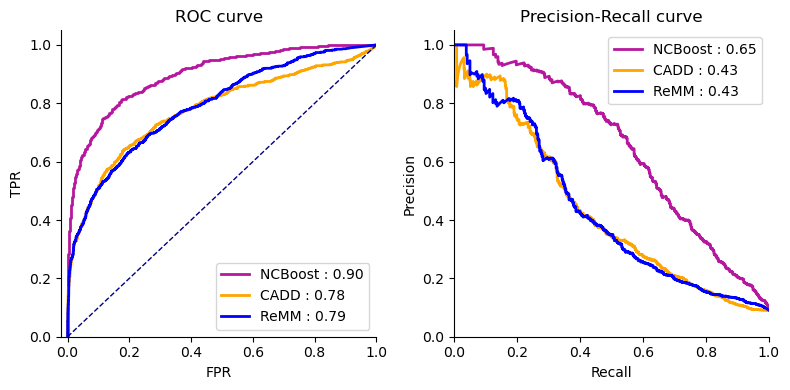

In [9]:
variants =  pl.read_csv(source = f'{l_path}/data/testing/testing_data_scored.tsv', 
                   separator = '\t',
                   null_values='NA',
                   schema_overrides={'chr':str}
                   )
from src.ncboost_functions import plot_roc_prc
plot_roc_prc(variants, save_path=f'models/{model_folder}', figure_name='ROC_PRC_testing')

## In-depth caracterization of single variants

In [13]:
import shap
from src.ncboost_functions import get_feature_list
from src.ncboost_functions import load_models

shap.initjs()

model_name = 'ncboost_models'

model_path = f'{l_path}/models/{model_name}'
model_dict = {}
models = load_models(model_path)


A, B, C, D = get_feature_list()
variables = ['chr', 'pos', 'ref', 'alt', 'region', 'closest_gene_name', 'closest_gene_ENSG', 
             'label', 'partition', 'matching_index', 'CADD', 'ReMM']
region_list = ['upstream', 'downstream', 'intronic', 'UTR5', 'UTR3', 'intergenic']
features = A + B + C + D + region_list

variants =  pl.read_csv(source = f'{l_path}/data/testing/testing_data_scored.tsv', 
                   separator = '\t',
                   null_values='NA',
                   schema_overrides={'chr': str, 'ZooUCE' : float}
                   )


### Example : characterization of the contribution of each feature to a specific variant score

In [14]:
l_variant = variants.filter(pl.col('rsid') == 'rs777661576')
l_variant.head()

chr,pos,rsid,ref,alt,label,region,closest_gene_name,closest_gene_ENSG,paml_dnds,slr_dnds,paml_pvalue,paml_bh,gene_age,pLI,zscore_mis,zscore_syn,loeuf,GDI,ncRVIS,ncGERP,RVIS_percentile,pcGERP,CADD_ENSG,CADD_GeneName,GC,CpG,priPhCons,mamPhCons,verPhCons,priPhyloP,mamPhyloP,verPhyloP,bStatistic,GerpRS,GerpRSpval,GerpN,GerpS,Aparent2,ZooPriPhyloP,ZooVerPhyloP,ZooRoCC,ZooUCE,Roulette-FILTER,Roulette-MR,Roulette-AR,CADD,CADD_phred,CDTS,mean_MAF,mean_MAF_afr,mean_MAF_ami,mean_MAF_amr,mean_MAF_asj,mean_MAF_eas,mean_MAF_fin,mean_MAF_mid,mean_MAF_nfe,mean_MAF_sas,ReMM,SpliceAI,UTR3,UTR5,downstream,intergenic,intronic,upstream,partition,partition_right,NCBoost
str,i64,str,str,str,i64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64
"""1""",11790916,"""rs777661576""","""C""","""T""",1,"""intronic""","""MTHFR""","""ENSG00000177000""",0.09733,0.09315,0.3499,0.6468,0.0,1.0506e-11,2.024,0.35912,0.859,4524.99996,-0.072474,-0.788072,60.710073,36.783405,"""ENSG00000177000""","""MTHFR""",0.57,0.053,0.004,0.0,0.0,0.407,-0.384,-0.372,900.0,null,null,1.46,-0.585,null,0.001,0.43,null,null,"""TFBS""",0.073,null,0.091441,1.519,1.45327,0.00197,0.005657,0.038807,0.0062,0.028183,0.011548,0.018624,0.043537,0.003341,0.015078,0.72465,0.91,0,0,0,0,1,0,6,6,0.864655


In [15]:
l_model = l_variant['partition'][0]
explainer = shap.TreeExplainer(models[l_model])

dtest = variants.filter(pl.col('partition') == l_model).select(features)

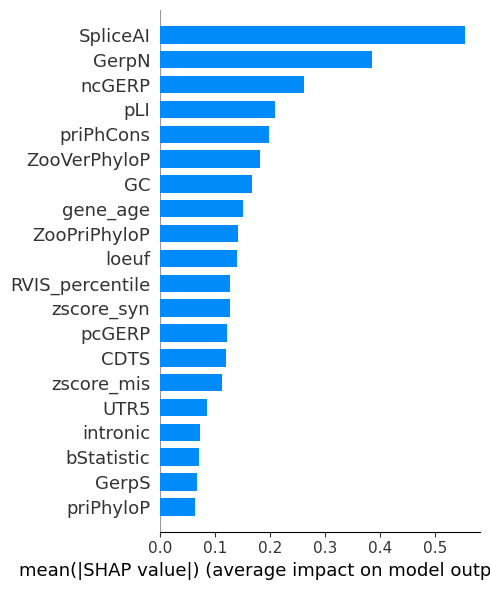

In [ ]:
shap_values = explainer.shap_values(dtest)
shap.summary_plot(shap_values, 
                  features=dtest, 
                  feature_names=dtest.columns, 
                  plot_type="bar", 
                  max_display=20, 
                  plot_size=[5,6]) 


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[10, :], dtest.to_pandas().iloc[10, :])


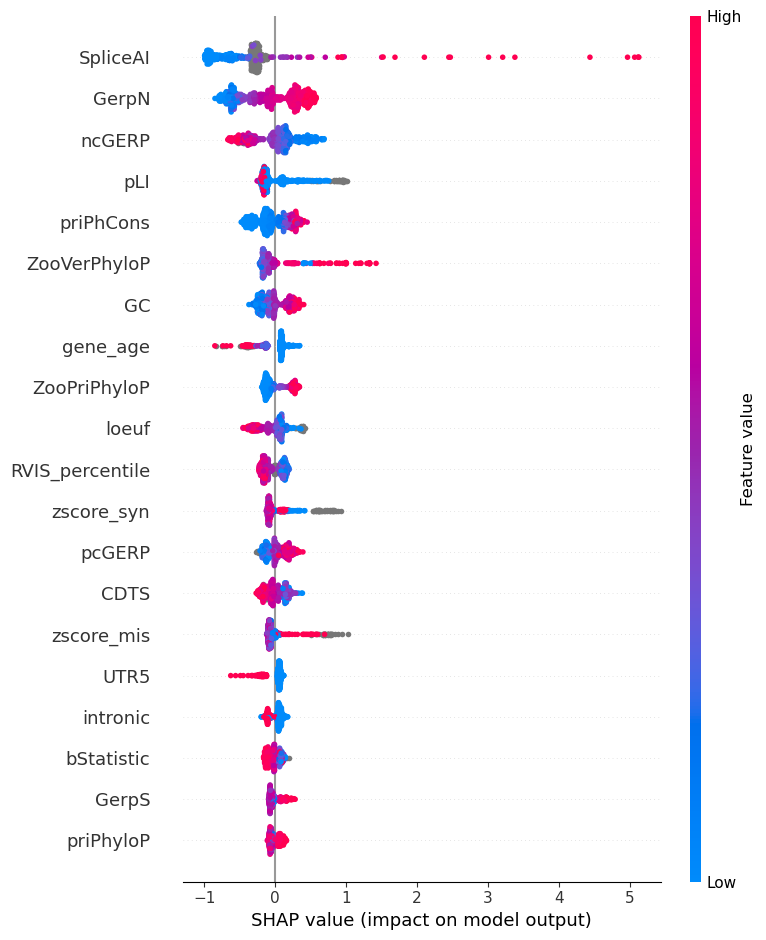

In [18]:
shap.summary_plot(shap_values, dtest.to_pandas())


In [ ]:
# explain the model's predictions using SHAP
shap_values = explainer(dtest.to_pandas())


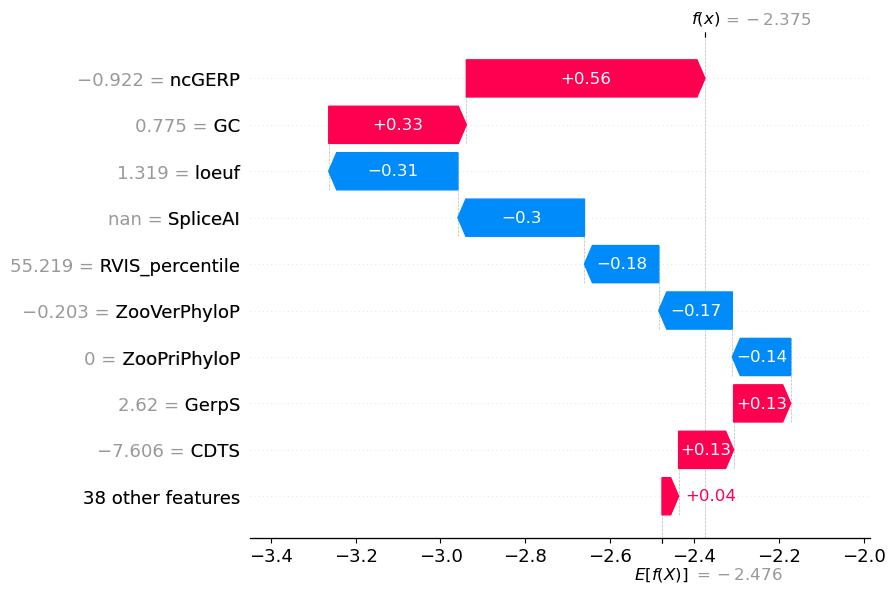

In [ ]:
shap.plots.waterfall(shap_values[1])